In [6]:
# Import standard libraries
import pandas as pd
import numpy as np
import sys

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


sys.path.append('../src') 

from utils.data_loader import load_data



In [7]:
df=load_data("../data/raw/MachineLearningRating_v3.txt",delimiter="|")

d:\projects\TenAcademy\week3\KAIM-WEEK-3\notebooks\../src\utils\data_loader.py:15: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter=delimiter)


Data loaded successfully from ../data/raw/MachineLearningRating_v3.txt


1. Data Understanding 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

1.2 DataType Rreview

From df.info() output:
Most numeric fields (int64, float64) look appropriate.
A few fields need conversion from object to proper types.
Some object fields are actually dates, booleans, or categoricals.

1.2.1 Convert Date Column

In [9]:
df["TransactionMonth"]

0          2015-03-01 00:00:00
1          2015-05-01 00:00:00
2          2015-07-01 00:00:00
3          2015-05-01 00:00:00
4          2015-07-01 00:00:00
                  ...         
1000093    2015-04-01 00:00:00
1000094    2015-06-01 00:00:00
1000095    2015-08-01 00:00:00
1000096    2014-07-01 00:00:00
1000097    2015-02-01 00:00:00
Name: TransactionMonth, Length: 1000098, dtype: object

In [10]:
df["TransactionMonth"] = pd.to_datetime(df["TransactionMonth"], errors='coerce')


1.2.2 Convert VehicleIntroDate to datetime

In [11]:
print(df["VehicleIntroDate"])

0                          6/2002
1                          6/2002
2                          6/2002
3                          6/2002
4                          6/2002
                    ...          
1000093    2013/01/01 12:00:00 AM
1000094    2013/01/01 12:00:00 AM
1000095    2013/01/01 12:00:00 AM
1000096    2013/01/01 12:00:00 AM
1000097    2013/01/01 12:00:00 AM
Name: VehicleIntroDate, Length: 1000098, dtype: object


In [12]:
from utils.clean_data import clean_vehicle_intro_date

df["VehicleIntroDate"] = df["VehicleIntroDate"].apply(clean_vehicle_intro_date)


d:\projects\TenAcademy\week3\KAIM-WEEK-3\notebooks\../src\utils\clean_data.py:15: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(date_str, infer_datetime_format=True)


In [13]:
df["VehicleIntroDate"]

0         2002-06-01
1         2002-06-01
2         2002-06-01
3         2002-06-01
4         2002-06-01
             ...    
1000093   2013-01-01
1000094   2013-01-01
1000095   2013-01-01
1000096   2013-01-01
1000097   2013-01-01
Name: VehicleIntroDate, Length: 1000098, dtype: datetime64[ns]

1.3 Convert to Boolean 

In [14]:
for col in ["AlarmImmobiliser", "TrackingDevice", "CapitalOutstanding", "NewVehicle", "WrittenOff", "Rebuilt", "Converted"]:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())



Unique values in 'AlarmImmobiliser':
['Yes' 'No']

Unique values in 'TrackingDevice':
['No' 'Yes']

Unique values in 'CapitalOutstanding':
[119300 161000 52700 ... 312900.0 13700.0 184500.0]

Unique values in 'NewVehicle':
['More than 6 months' nan 'Less than 6 months']

Unique values in 'WrittenOff':
[nan 'No' 'Yes']

Unique values in 'Rebuilt':
[nan 'No' 'Yes']

Unique values in 'Converted':
[nan 'No' 'Yes']


In [15]:
yes_no_mapping = {"Yes": True, "No": False}

for col in ["AlarmImmobiliser", "TrackingDevice", "WrittenOff", "Rebuilt", "Converted"]:
    df[col] = df[col].map(yes_no_mapping)


Convert to category

In [16]:
cat_cols = [
    "Province", "VehicleType", "make", "Model", "bodytype",
    "CoverType", "CoverCategory", "CoverGroup", "Product",
    "StatutoryClass", "StatutoryRiskType", "TermFrequency", "Section"
]


for col in cat_cols:
    print(f"\nColumn: {col}")
    print(f"Unique values ({df[col].nunique()}):")
    print(df[col].unique()[:10])  # Show first 10 unique values to avoid flooding



Column: Province
Unique values (9):
['Gauteng' 'KwaZulu-Natal' 'Mpumalanga' 'Eastern Cape' 'Western Cape'
 'Limpopo' 'North West' 'Free State' 'Northern Cape']

Column: VehicleType
Unique values (5):
['Passenger Vehicle' 'Medium Commercial' 'Heavy Commercial'
 'Light Commercial' 'Bus' nan]

Column: make
Unique values (46):
['MERCEDES-BENZ' 'VOLKSWAGEN' 'RENAULT' 'FORD' 'BMW' 'AUDI' 'VOLVO'
 'PROTON' 'TOYOTA' 'NISSAN/DATSUN                      ']

Column: Model
Unique values (411):
['E 240' 'TOUAREG 5.0 V10 TDI TIP' 'SCENIC 1.9 dCi EXPRESSION'
 'TERRITORY 4.0i GHIA AWD A/T' '320i (E90)' 'FIESTA 1.6 SPORT 5Dr'
 'A4 1.8T ATTRACTION (B8)' 'S40 T5 A/T' 'SAVVY 1.2 SPORT' 'GEN 2 1.6 GL']

Column: bodytype
Unique values (13):
['S/D' 'SUV' 'MPV' 'H/B' 'P/V' 'B/S' 'S/W' 'C/C' 'D/C' 'D/S']

Column: CoverType
Unique values (22):
['Windscreen' 'Own Damage' 'Third Party' 'Passenger Liability'
 'Signage and Vehicle Wraps' 'Keys and Alarms'
 'Cleaning and Removal of Accident Debris' 'Emergency Charg

In [17]:
for col in cat_cols:
    df[col] = df[col].astype("category")

Let's check the number of unique values in other object cols and see if we can convert it to category type

In [18]:
# List object dtype columns
object_cols = df.select_dtypes(include='object').columns.tolist()

# For each, get unique value counts
for col in object_cols:
    unique_count = df[col].nunique(dropna=True)
    total_count = len(df)
    print(f"Column: {col}, Unique values: {unique_count}, Percent unique: {unique_count/total_count:.4%}")


Column: Citizenship, Unique values: 4, Percent unique: 0.0004%
Column: LegalType, Unique values: 6, Percent unique: 0.0006%
Column: Title, Unique values: 5, Percent unique: 0.0005%
Column: Language, Unique values: 1, Percent unique: 0.0001%
Column: Bank, Unique values: 11, Percent unique: 0.0011%
Column: AccountType, Unique values: 3, Percent unique: 0.0003%
Column: MaritalStatus, Unique values: 3, Percent unique: 0.0003%
Column: Gender, Unique values: 3, Percent unique: 0.0003%
Column: Country, Unique values: 1, Percent unique: 0.0001%
Column: MainCrestaZone, Unique values: 16, Percent unique: 0.0016%
Column: SubCrestaZone, Unique values: 45, Percent unique: 0.0045%
Column: ItemType, Unique values: 1, Percent unique: 0.0001%
Column: CapitalOutstanding, Unique values: 1011, Percent unique: 0.1011%
Column: NewVehicle, Unique values: 2, Percent unique: 0.0002%
Column: WrittenOff, Unique values: 2, Percent unique: 0.0002%
Column: Rebuilt, Unique values: 2, Percent unique: 0.0002%
Column: 

In [19]:
cols_to_cat = [
    "Citizenship", "LegalType", "Title",  "Bank", "AccountType",
    "MaritalStatus", "Gender",  "MainCrestaZone", "SubCrestaZone",
   "NewVehicle", "WrittenOff", "Rebuilt", "Converted",
    "CrossBorder", "ExcessSelected"
]

for col in cols_to_cat:
    df[col] = df[col].astype('category')


 Clean and convert CapitalOutstanding to numeric

In [20]:
df['CapitalOutstanding'] = pd.to_numeric(df['CapitalOutstanding'], errors='coerce')
print(f"CapitalOutstanding dtype after conversion: {df['CapitalOutstanding'].dtype}")


CapitalOutstanding dtype after conversion: float64


In [21]:
df.dtypes

UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                       category
LegalType                         category
Title                             category
Language                            object
Bank                              category
AccountType                       category
MaritalStatus                     category
Gender                            category
Country                             object
Province                          category
PostalCode                           int64
MainCrestaZone                    category
SubCrestaZone                     category
ItemType                            object
mmcode                             float64
VehicleType                       category
RegistrationYear                     int64
make                              category
Model                             category
Cylinders  

2. Missing Values Check

In [22]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    "Missing Count": missing,
    "Missing Percentage": missing_percent
}).sort_values(by="Missing Percentage", ascending=False)

print(missing_df[missing_df["Missing Count"] > 0])

                         Missing Count  Missing Percentage
NumberOfVehiclesInFleet        1000098          100.000000
CrossBorder                     999400           99.930207
CustomValueEstimate             779642           77.956560
Rebuilt                         641901           64.183810
Converted                       641901           64.183810
WrittenOff                      641901           64.183810
NewVehicle                      153295           15.327998
Bank                            145961           14.594670
AccountType                      40232            4.022806
Gender                            9536            0.953507
MaritalStatus                     8259            0.825819
VehicleType                        552            0.055195
make                               552            0.055195
mmcode                             552            0.055195
Model                              552            0.055195
Cylinders                          552            0.0551

1. Drop cols with hight percentage of missing values

In [23]:
# Drop completely empty or near-empty columns
df.drop(columns=["NumberOfVehiclesInFleet", "CrossBorder",'CustomValueEstimate'], inplace=True)

2. Categorical Columns with few missing (≤15%)

In [24]:
# fill with 'Unknown'
cat_fill_unknown = ['Bank', 'AccountType', 'NewVehicle']

for col in cat_fill_unknown:
    if 'Unknown' not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories('Unknown')
    df[col] = df[col].fillna('Unknown')


3. Yes/No columns with many missing values

In [25]:
for col in ['Converted', 'WrittenOff', 'Rebuilt']:
    df[col] = df[col].fillna(False)

4.  Impute with mode — low-miss categorical

In [26]:
for col in ['Gender', 'MaritalStatus']:
    df[col] = df[col].fillna(df[col].mode()[0])


5. Drop rows — small % of data

In [27]:
df.dropna(subset=[
    'make', 'Model', 'mmcode', 'Cylinders', 'cubiccapacity',
    'kilowatts', 'bodytype', 'VehicleType', 'VehicleIntroDate',
    'NumberOfDoors'
], inplace=True)


6. Fill missing values in numeric with 0

In [28]:
df['CapitalOutstanding'] = df['CapitalOutstanding'].fillna(0)

In [29]:
df.isna().sum()

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle                  0
WrittenOff

3. Check for duplicate rows

In [30]:
print("Duplicates:", df.duplicated().sum())


Duplicates: 74


In [31]:
df = df.drop_duplicates()

# Confirm duplicates are removed
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows after removal: 0


## EDA Sumary

I performed exploratory data analysis on the car insurance claims dataset to understand the data distribution and quality. I examined the data types and unique values, identifying categorical, numerical, and boolean features. Missing data analysis revealed some columns with very high missingness, such as CustomValueEstimate, which I dropped to maintain data integrity. For columns with moderate missing values, I applied sensible imputations — for example, filling boolean flags with False and categorical variables with a new category "Unknown". This cleaning step ensures the dataset is ready for further analysis and modeling while preserving meaningful information. I have also removed 74 duplicate values

Statistical thinking

In [32]:
df.describe()

,UnderwrittenCoverID,PolicyID,TransactionMonth,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,VehicleIntroDate,CapitalOutstanding,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,999472.000000,999472.000000,999472,999472.000000,9.994720e+05,999472.000000,999472.000000,999472.000000,999472.000000,999472.000000,999472,999472.000000,9.994720e+05,999472.000000,999472.000000,999472.000000
mean,104803.903254,7955.791751,2015-02-28 10:26:10.659708672,3019.531407,5.487732e+07,2010.225276,4.046646,2466.726433,97.206898,4.019251,2008-04-20 17:22:23.422928128,52621.221232,6.038739e+05,116.163080,61.376816,64.344834
min,1.000000,14.000000,2013-10-01 00:00:00,1.000000,4.041200e+06,1987.000000,0.000000,0.000000,0.000000,0.000000,1977-10-01 00:00:00,-2.000000,1.000000e-02,0.000000,-782.576754,-12002.412281
25%,55127.000000,4500.000000,2015-01-01 00:00:00,821.000000,6.005692e+07,2008.000000,4.000000,2237.000000,75.000000,4.000000,2007-11-01 00:00:00,0.000000,5.000000e+03,3.225700,0.000000,0.000000
50%,94069.000000,7070.000000,2015-04-01 00:00:00,2000.000000,6.005842e+07,2011.000000,4.000000,2694.000000,111.000000,4.000000,2010-10-01 00:00:00,0.000000,7.500000e+03,8.436900,2.179737,0.000000
75%,139191.000000,11077.000000,2015-06-01 00:00:00,4171.000000,6.005842e+07,2013.000000,4.000000,2694.000000,111.000000,4.000000,2012-04-01 00:00:00,0.000000,2.500000e+05,90.000000,21.929825,0.000000
max,301175.000000,23246.000000,2015-08-01 00:00:00,9870.000000,6.506535e+07,2015.000000,10.000000,12880.000000,309.000000,6.000000,2014-09-01 00:00:00,700000.000000,1.000000e+07,3051.821100,2253.507281,393092.105263
std,63299.055320,5290.122346,NaN,2649.217715,1.360424e+07,3.261150,0.294031,442.812714,19.393610,0.468332,NaN,111430.355997,1.507344e+06,220.579741,157.018881,2369.652370


# **Univariate Analysis**

1. Histograms for numerical columns

        TotalPremium    TotalClaims    SumInsured
count  999472.000000  999472.000000  9.994720e+05
mean       61.376816      64.344834  6.038739e+05
std       157.018881    2369.652370  1.507344e+06
min      -782.576754  -12002.412281  1.000000e-02
25%         0.000000       0.000000  5.000000e+03
50%         2.179737       0.000000  7.500000e+03
75%        21.929825       0.000000  2.500000e+05
max      2253.507281  393092.105263  1.000000e+07


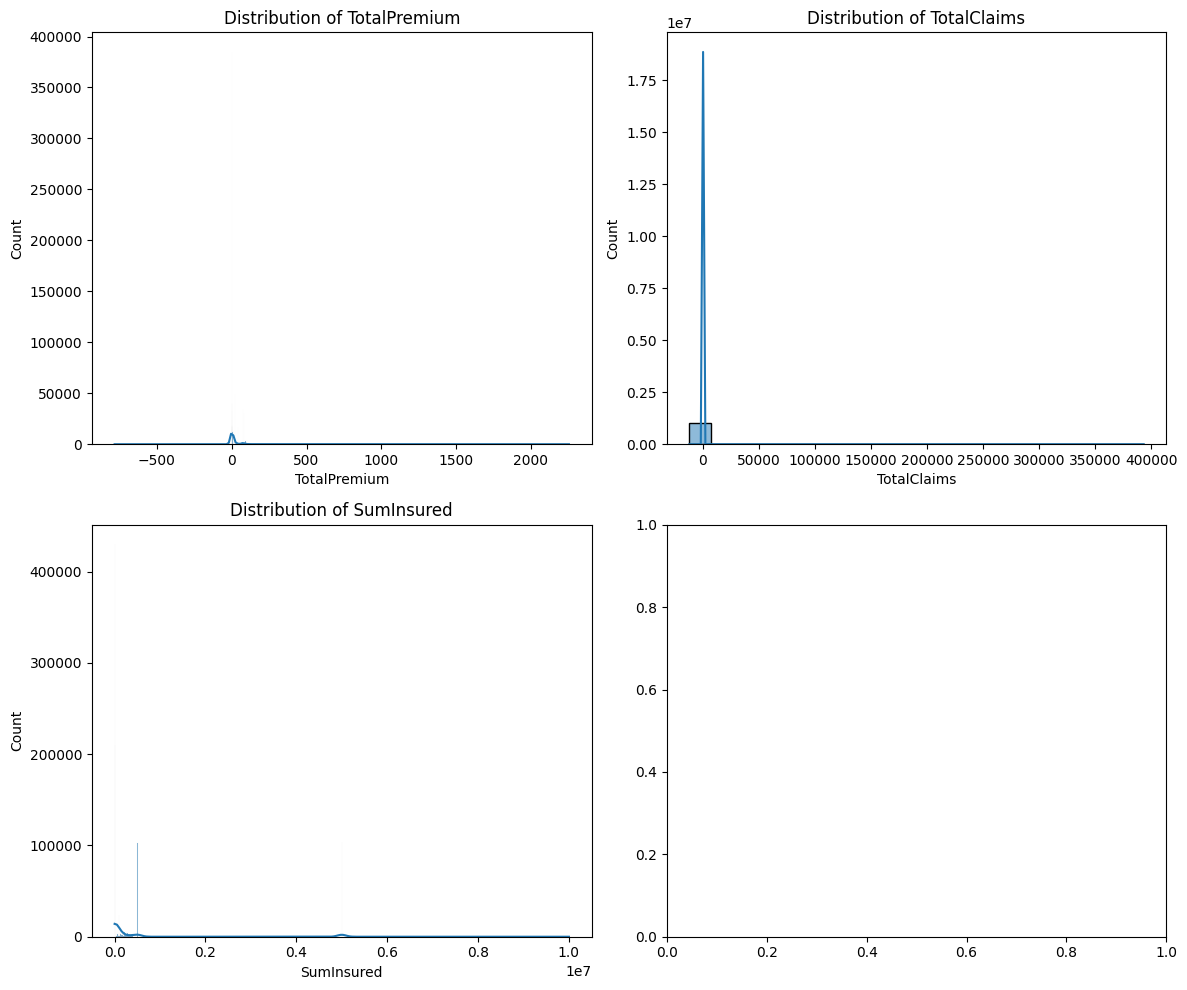

In [33]:
# Numerical features summary
num_cols = ['TotalPremium', 'TotalClaims', 'SumInsured']
print(df[num_cols].describe())

# Plot distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

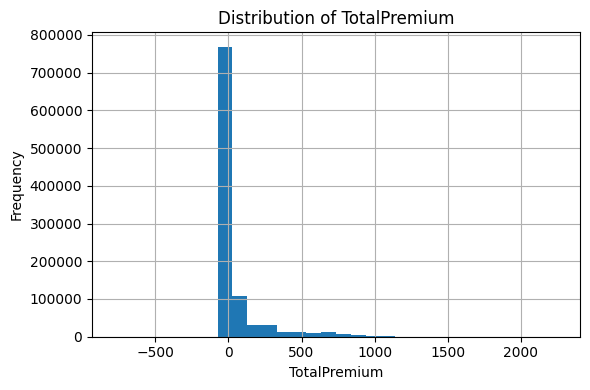

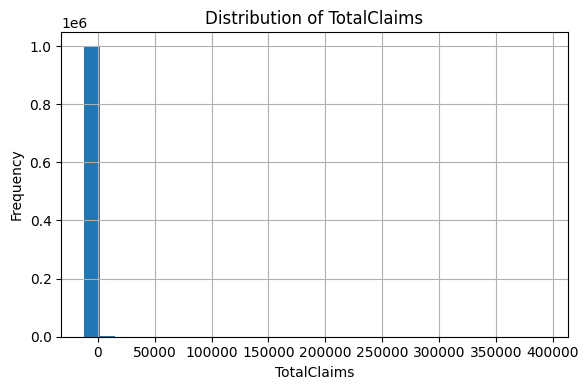

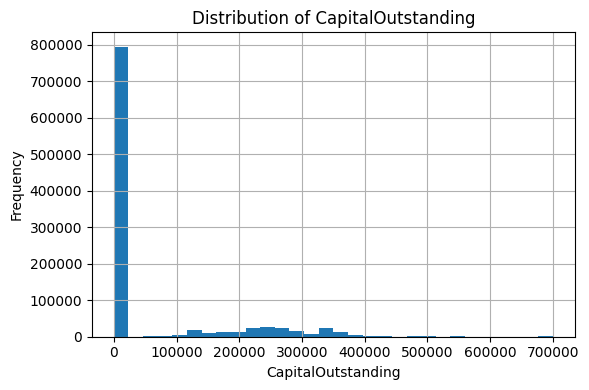

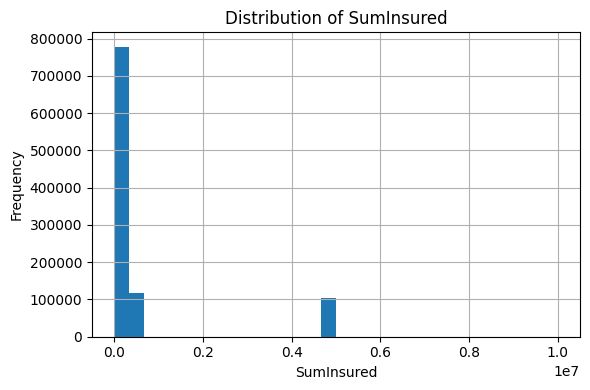

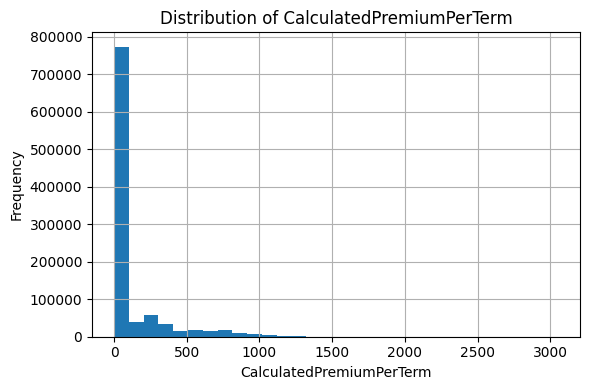

In [34]:
import matplotlib.pyplot as plt

# Define important numeric features
important_num_cols = [
    'TotalPremium',
    'TotalClaims',
    'CapitalOutstanding',
    'SumInsured',
    'CalculatedPremiumPerTerm',
    # 'CustomValueEstimate'  
]

# Filter only existing columns
important_num_cols = [col for col in important_num_cols if col in df.columns]

# Plot histograms
for col in important_num_cols:
    plt.figure(figsize=(6, 4))
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


2. Bar charts for categorical columns

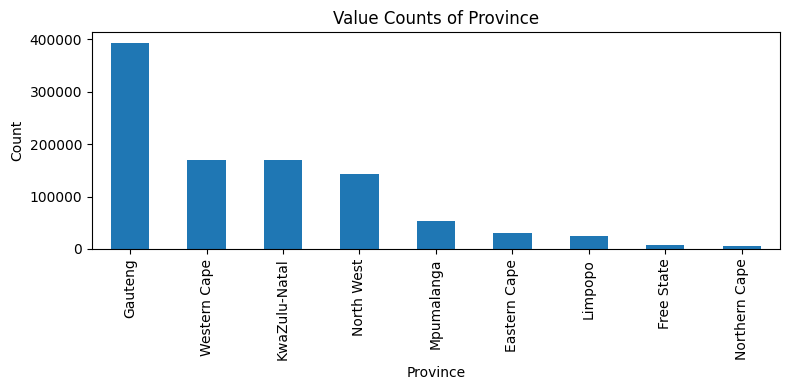

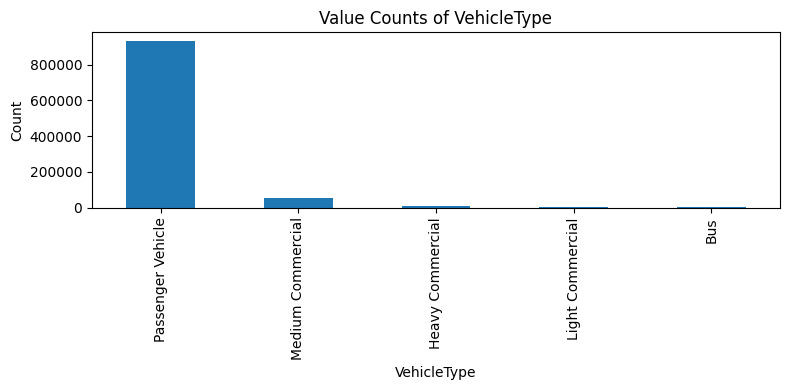

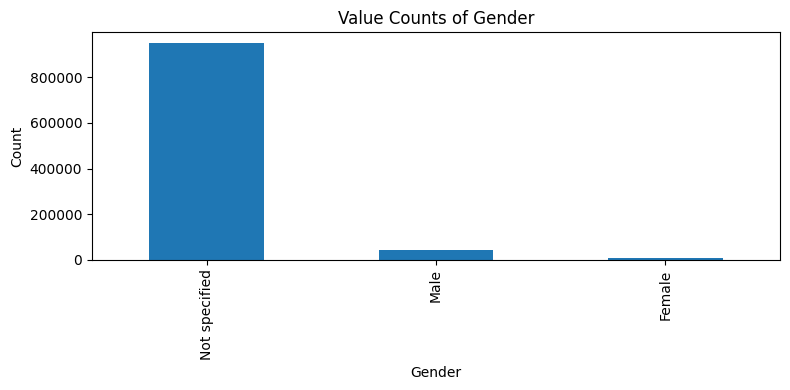

C:\Users\user\AppData\Local\Temp\ipykernel_1460\2865573336.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


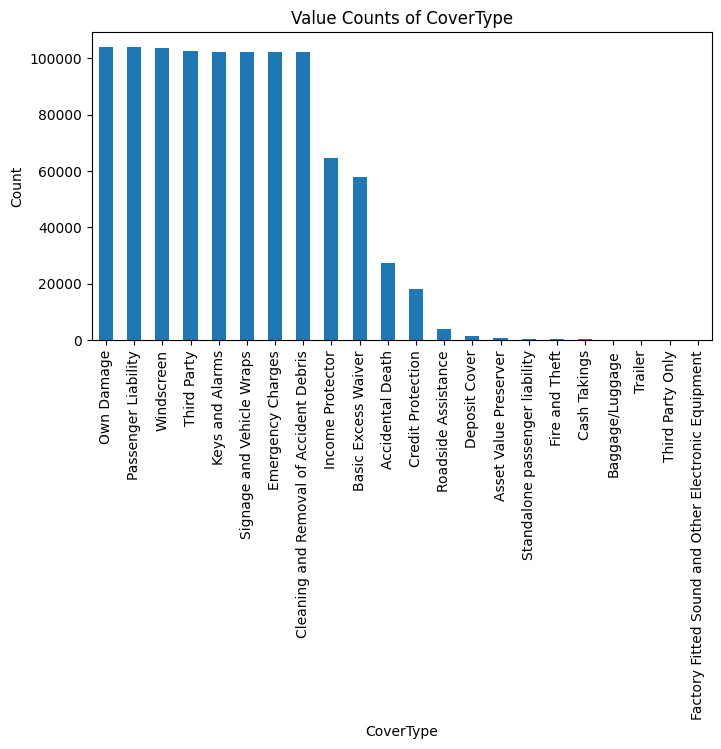

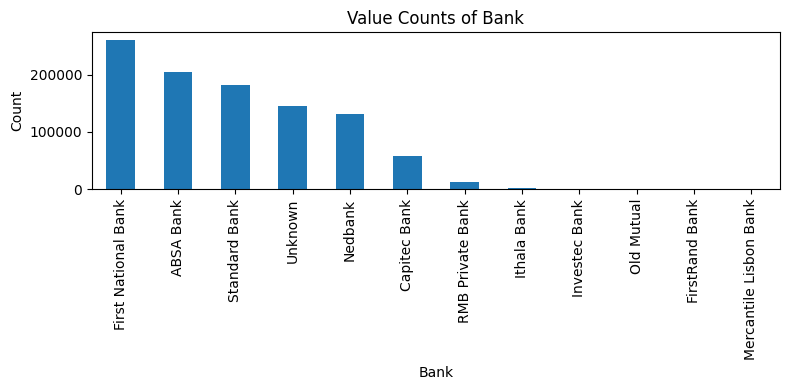

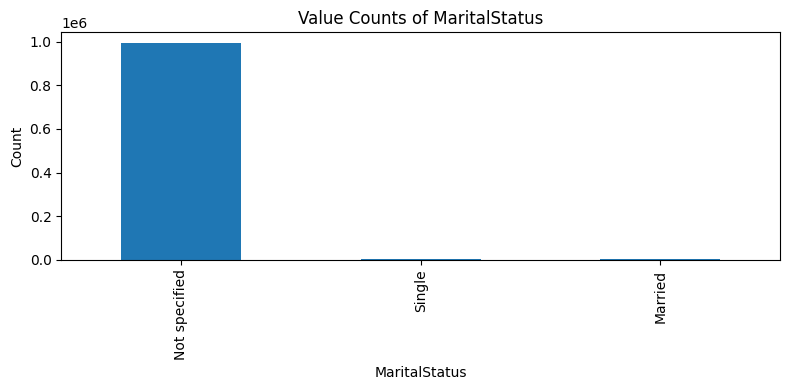

In [35]:

#  important categorical columns
important_cat_cols = [
    'Province',
    'VehicleType',
    'Gender',
    'CoverType',
    'Bank',
    'MaritalStatus'
]

# Filter only existing columns in df
important_cat_cols = [col for col in important_cat_cols if col in df.columns]

# Plot bar charts for selected categorical columns
for col in important_cat_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Value Counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()



# **Bivariate or Multivariate Analysis**

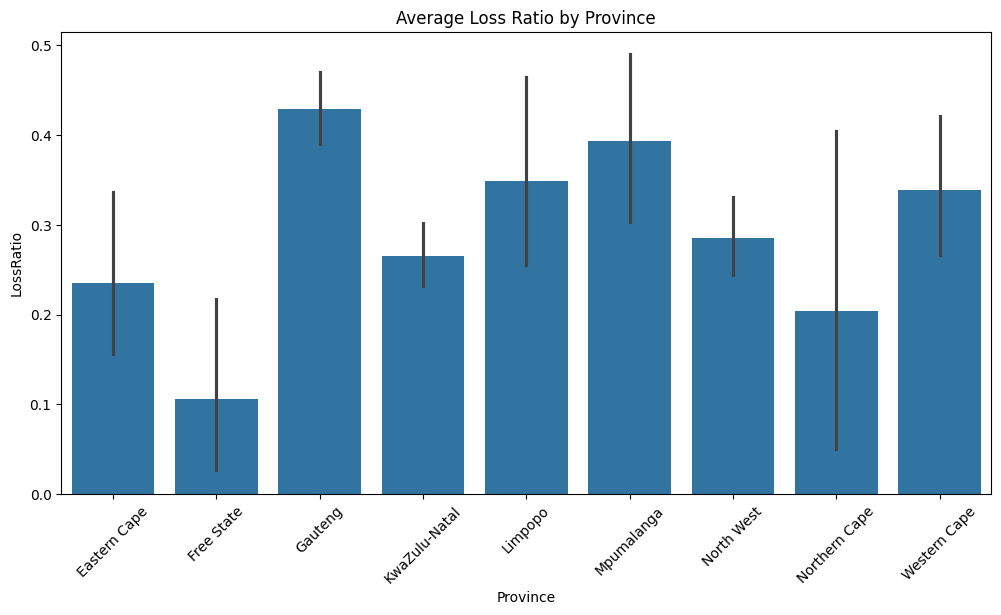

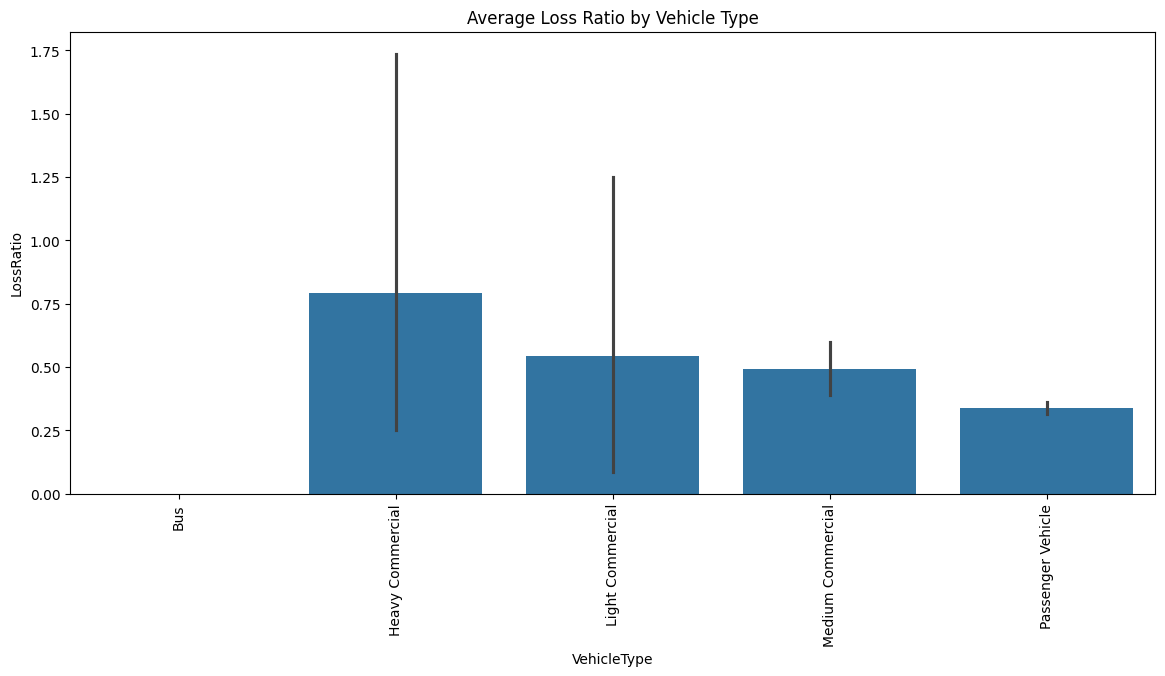

In [36]:
# Calculate Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Loss Ratio by Province
plt.figure(figsize=(12, 6))
sns.barplot(x='Province', y='LossRatio', data=df, estimator=np.mean)
plt.title('Average Loss Ratio by Province')
plt.xticks(rotation=45)
plt.show()

# Loss Ratio by Vehicle Type
plt.figure(figsize=(14, 6))
sns.barplot(x='VehicleType', y='LossRatio', data=df, estimator=np.mean)
plt.title('Average Loss Ratio by Vehicle Type')
plt.xticks(rotation=90)
plt.show()

1. Correlation Matrix for numerical variables

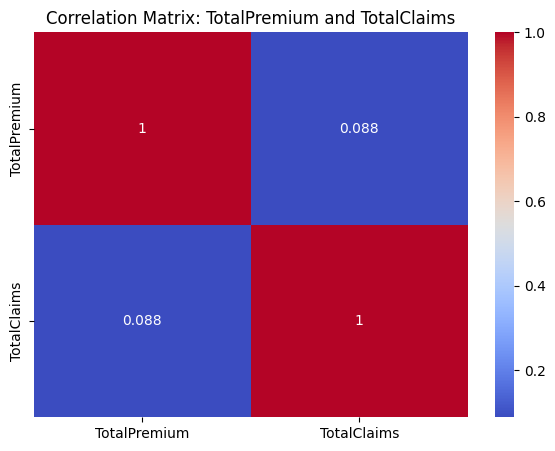

In [37]:

# Select numerical columns including TotalPremium and TotalClaims
num_cols = ['TotalPremium', 'TotalClaims']

# Calculate correlation matrix
corr = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: TotalPremium and TotalClaims')
plt.show()


2. Scatter plot of TotalPremium vs TotalClaims colored by PostalCode

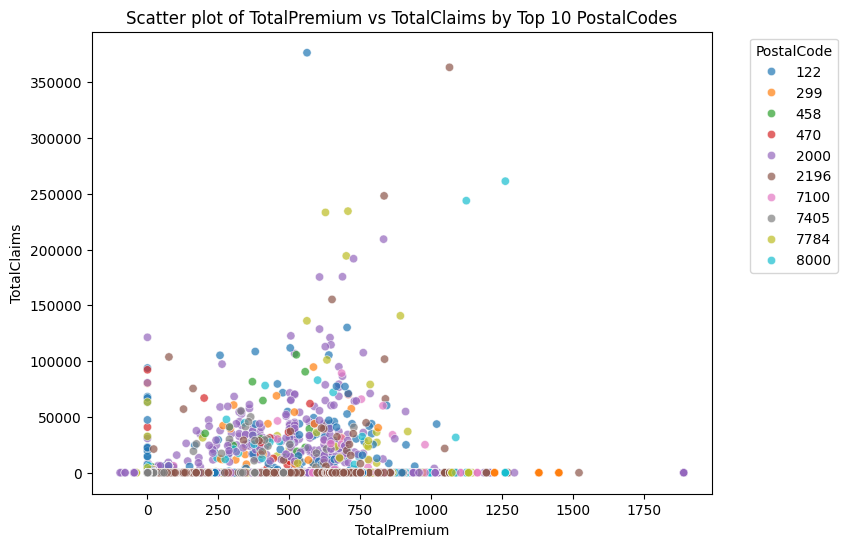

In [38]:
#  Top N Postal Codes by Frequency
top_postal_codes = df['PostalCode'].value_counts().nlargest(10).index
df_top = df[df['PostalCode'].isin(top_postal_codes)]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_top, x='TotalPremium', y='TotalClaims', hue='PostalCode', palette='tab10', alpha=0.7)
plt.title('Scatter plot of TotalPremium vs TotalClaims by Top 10 PostalCodes')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.legend(title='PostalCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [39]:
group_corr = df.groupby('PostalCode')[['TotalPremium', 'TotalClaims']].corr().iloc[0::2,-1]

print(group_corr)


PostalCode              
1           TotalPremium    0.088382
2           TotalPremium    0.133329
4           TotalPremium         NaN
5           TotalPremium    0.231482
6           TotalPremium    0.205668
                              ...   
9781        TotalPremium   -0.019394
9830        TotalPremium         NaN
9868        TotalPremium         NaN
9869        TotalPremium   -0.005155
9870        TotalPremium         NaN
Name: TotalClaims, Length: 888, dtype: float64


# **Data Comparison**


Trends Over Geography

1. Average Premium by Province

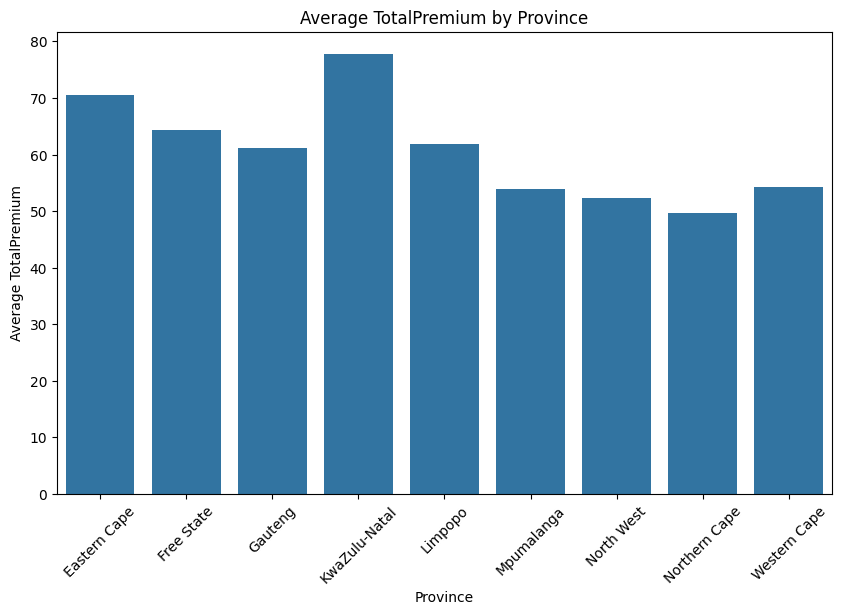

In [40]:
avg_premium_by_province = (
    df.groupby('Province', observed=True)['TotalPremium']
    .mean()
    .sort_values(ascending=False)
)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_premium_by_province.index, y=avg_premium_by_province.values)
plt.xticks(rotation=45)
plt.title('Average TotalPremium by Province')
plt.ylabel('Average TotalPremium')
plt.xlabel('Province')
plt.show()


2. CoverType by Province

C:\Users\user\AppData\Local\Temp\ipykernel_1460\1089941031.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cover_counts = df.groupby(['Province', 'CoverType']).size().unstack(fill_value=0)


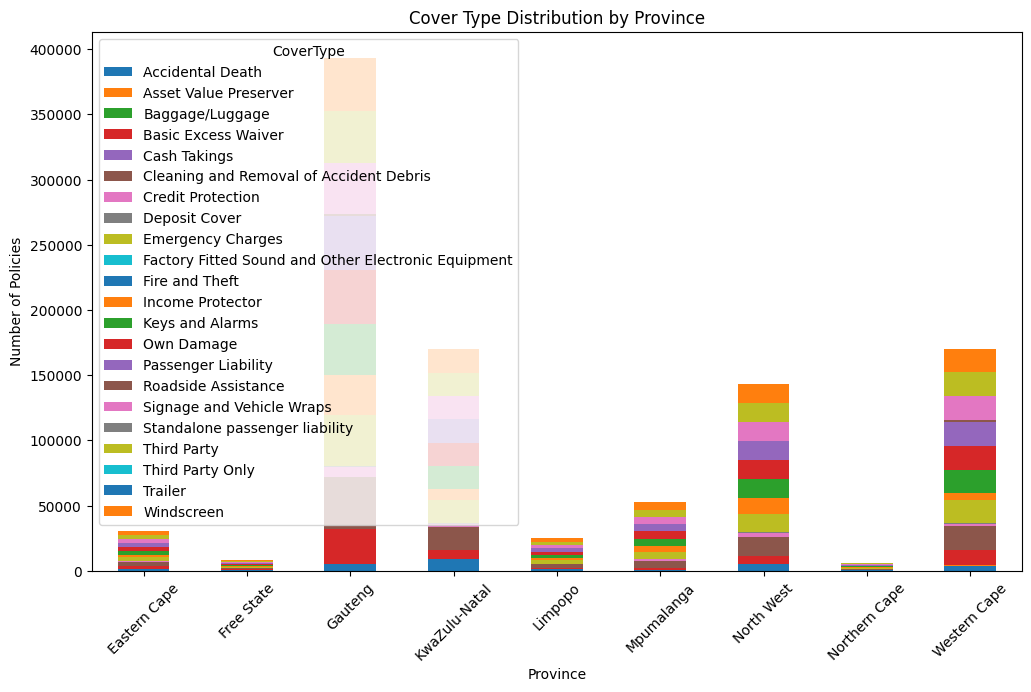

In [41]:

# Count of CoverType by Province
cover_counts = df.groupby(['Province', 'CoverType']).size().unstack(fill_value=0)

cover_counts.plot(kind='bar', stacked=True, figsize=(12,7))
plt.title('Cover Type Distribution by Province')
plt.ylabel('Number of Policies')
plt.xlabel('Province')
plt.xticks(rotation=45)
plt.legend(title='CoverType')
plt.show()


3. Term Frequency by Province

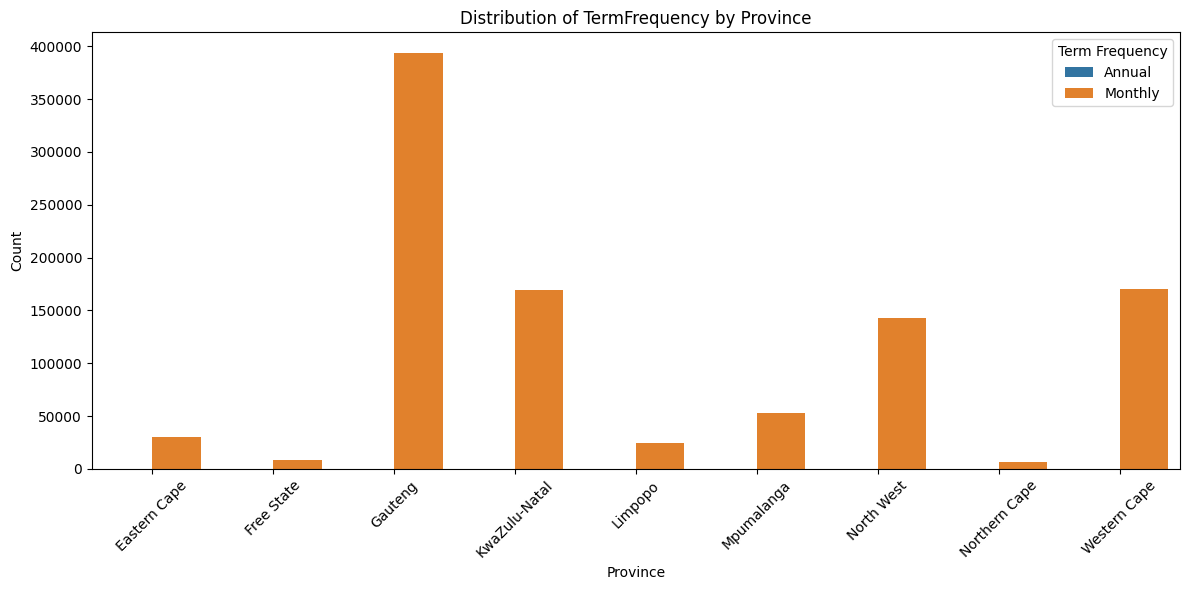

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Province', hue='TermFrequency')
plt.title('Distribution of TermFrequency by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.legend(title='Term Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


4. Gender by Province

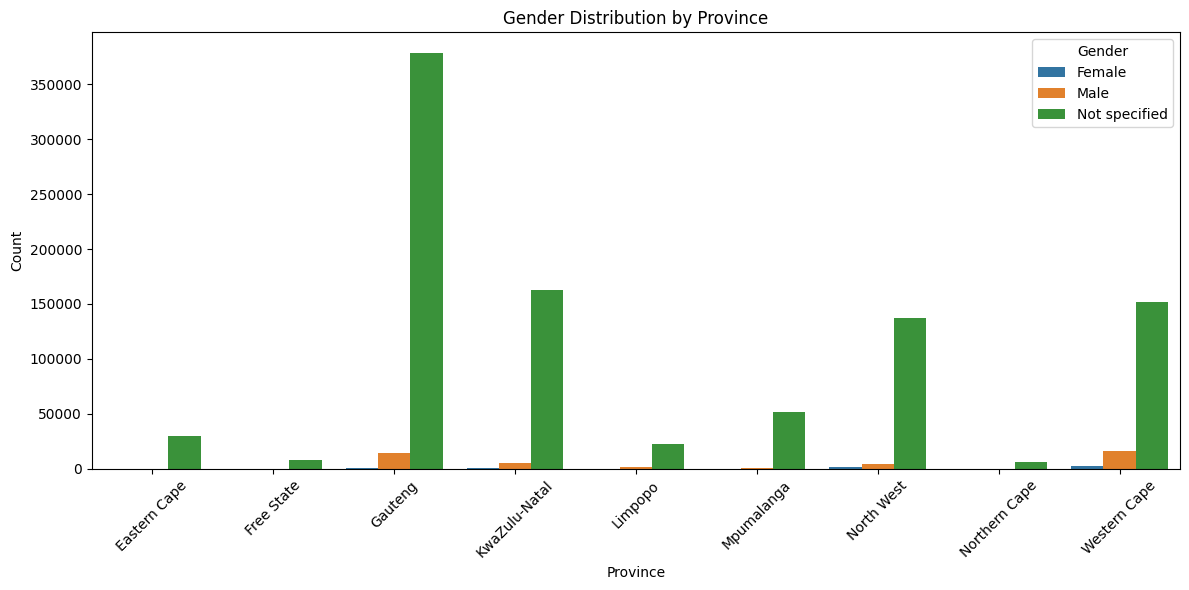

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Province', hue='Gender')
plt.title('Gender Distribution by Province')
plt.xlabel('Province')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Outliers Detection

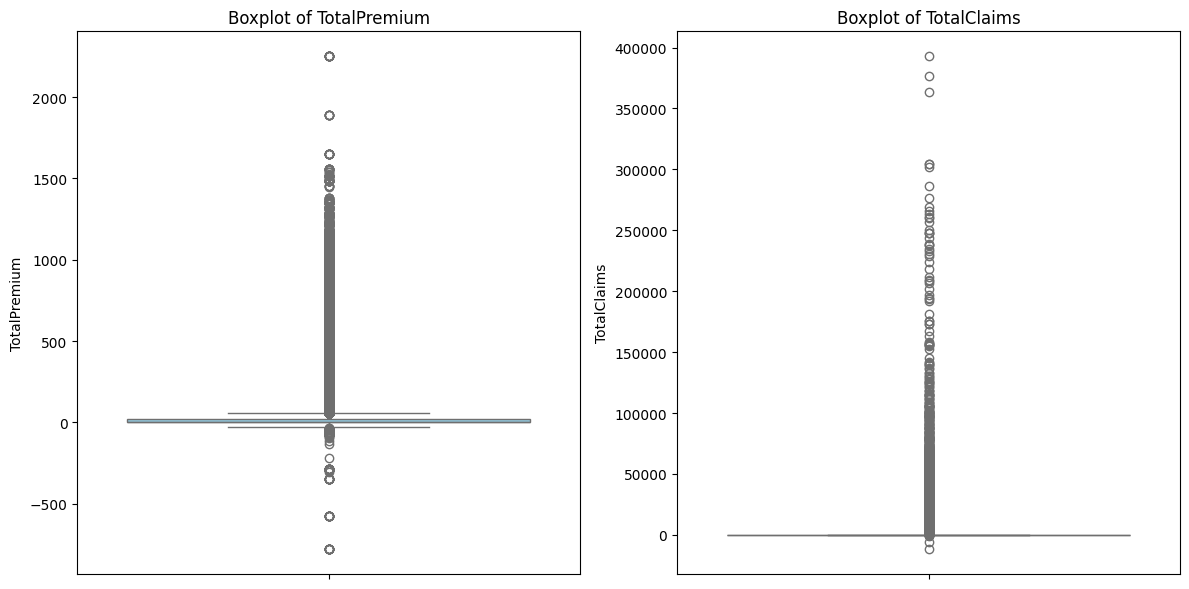

In [44]:
# List of numerical columns to inspect
num_cols = ['TotalPremium', 'TotalClaims']

plt.figure(figsize=(12, 6))

for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

Visualization

1. Top Vehicle Makes by Average Premium

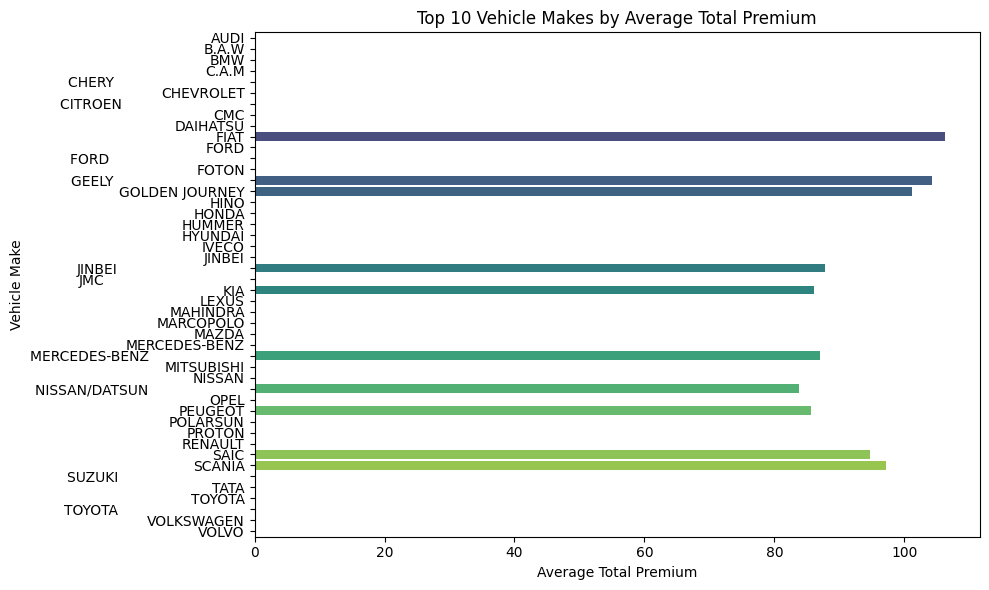

In [45]:
top_makes = df.groupby('make', observed=False)['TotalPremium'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_makes.values, y=top_makes.index, hue=top_makes.index, palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Vehicle Makes by Average Total Premium')
plt.xlabel('Average Total Premium')
plt.ylabel('Vehicle Make')
plt.tight_layout()
plt.show()


2. Premium vs. Claims by Province
Show relationship between premiums collected and claims paid across provinces.

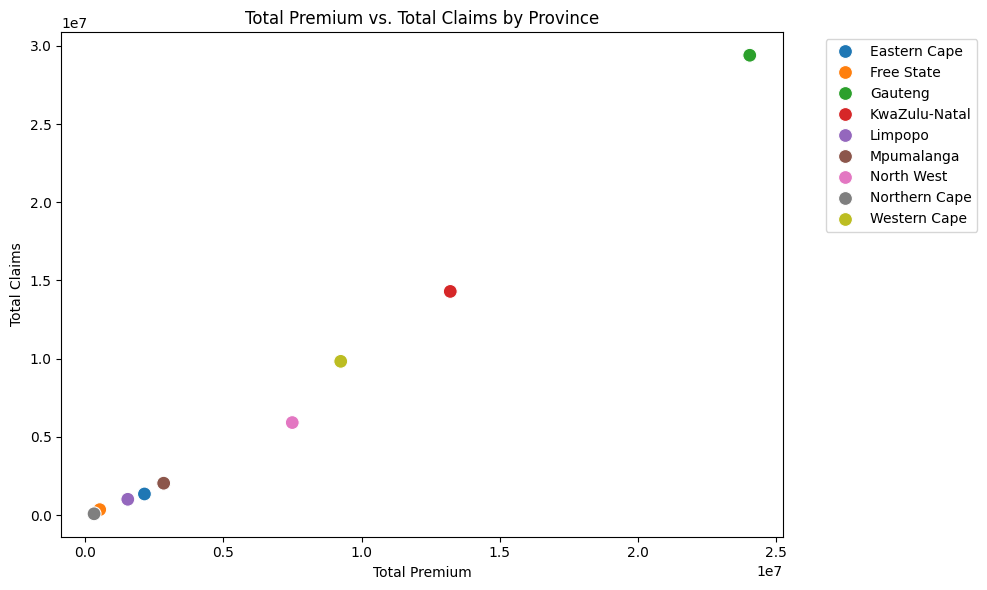

In [46]:
prov_stats = df.groupby('Province',observed=False)[['TotalPremium', 'TotalClaims']].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=prov_stats, x='TotalPremium', y='TotalClaims', hue='Province', s=100, palette='tab10')
plt.title('Total Premium vs. Total Claims by Province')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


3. Boxplot of Premiums by Cover Type
Visualize how different insurance cover types impact premium costs.

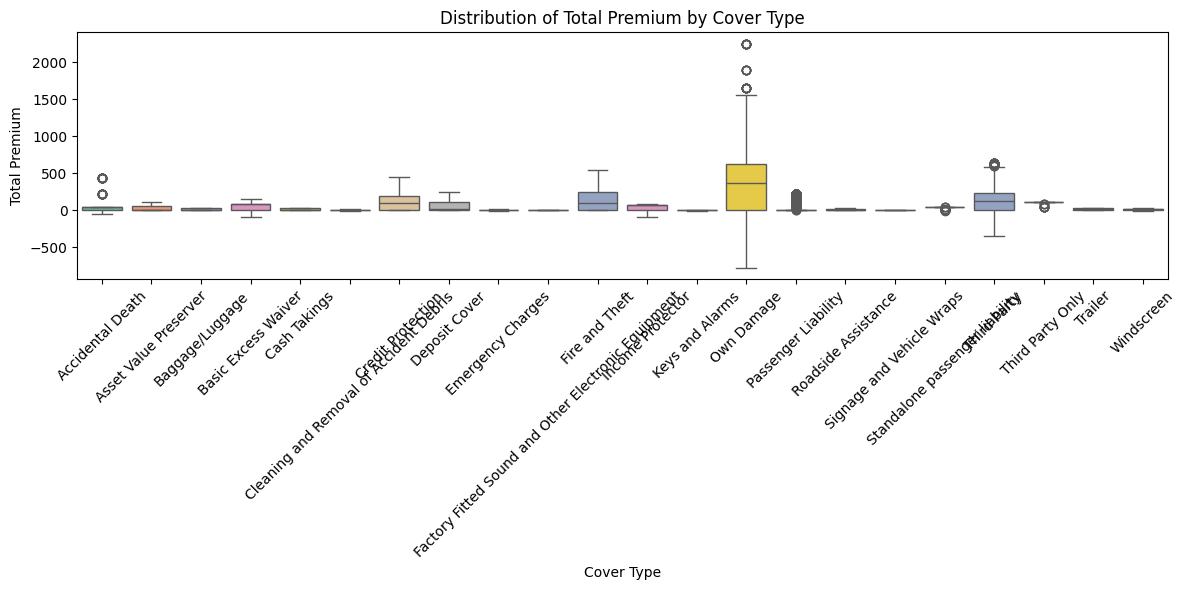

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='CoverType', y='TotalPremium', hue='CoverType', palette='Set2', legend=False)
plt.title('Distribution of Total Premium by Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Total Premium')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Key Insights from EDA

1. Overall Loss Ratio (TotalClaims / TotalPremium)


In [48]:
# Overall loss ratio
overall_loss_ratio = df['TotalClaims'].sum() / df['TotalPremium'].sum()
print(f"Overall Loss Ratio: {overall_loss_ratio:.2f}")


Overall Loss Ratio: 1.05


In [49]:
# By Province
loss_by_province = df.groupby('Province',observed=False)[['TotalClaims', 'TotalPremium']].sum()
loss_by_province['LossRatio'] = loss_by_province['TotalClaims'] / loss_by_province['TotalPremium']
print(loss_by_province.sort_values('LossRatio', ascending=False))
print("\n")
# By VehicleType
loss_by_vehicle = df.groupby('VehicleType',observed=False)[['TotalClaims', 'TotalPremium']].sum()
loss_by_vehicle['LossRatio'] = loss_by_vehicle['TotalClaims'] / loss_by_vehicle['TotalPremium']
print(loss_by_vehicle.sort_values('LossRatio', ascending=False))
print("\n")

# By Gender
loss_by_gender = df.groupby('Gender',observed=False)[['TotalClaims', 'TotalPremium']].sum()
loss_by_gender['LossRatio'] = loss_by_gender['TotalClaims'] / loss_by_gender['TotalPremium']
print(loss_by_gender)


                TotalClaims  TotalPremium  LossRatio
Province                                            
Gauteng        2.939415e+07  2.404896e+07   1.222263
KwaZulu-Natal  1.430138e+07  1.320908e+07   1.082693
Western Cape   9.833088e+06  9.244403e+06   1.063680
North West     5.920250e+06  7.490508e+06   0.790367
Mpumalanga     2.044675e+06  2.836106e+06   0.720945
Free State     3.549223e+05  5.213632e+05   0.680758
Limpopo        1.016477e+06  1.537324e+06   0.661199
Eastern Cape   1.356427e+06  2.140104e+06   0.633813
Northern Cape  8.949051e+04  3.165581e+05   0.282699


                    TotalClaims  TotalPremium  LossRatio
VehicleType                                             
Heavy Commercial   7.504746e+05  4.609479e+05   1.628112
Medium Commercial  4.119867e+06  3.922746e+06   1.050251
Passenger Vehicle  5.937207e+07  5.664197e+07   1.048199
Light Commercial   6.045250e+04  2.604975e+05   0.232066
Bus                7.996535e+03  5.824474e+04   0.137292


              

 2. Temporal Trends: Claim Frequency and Severity

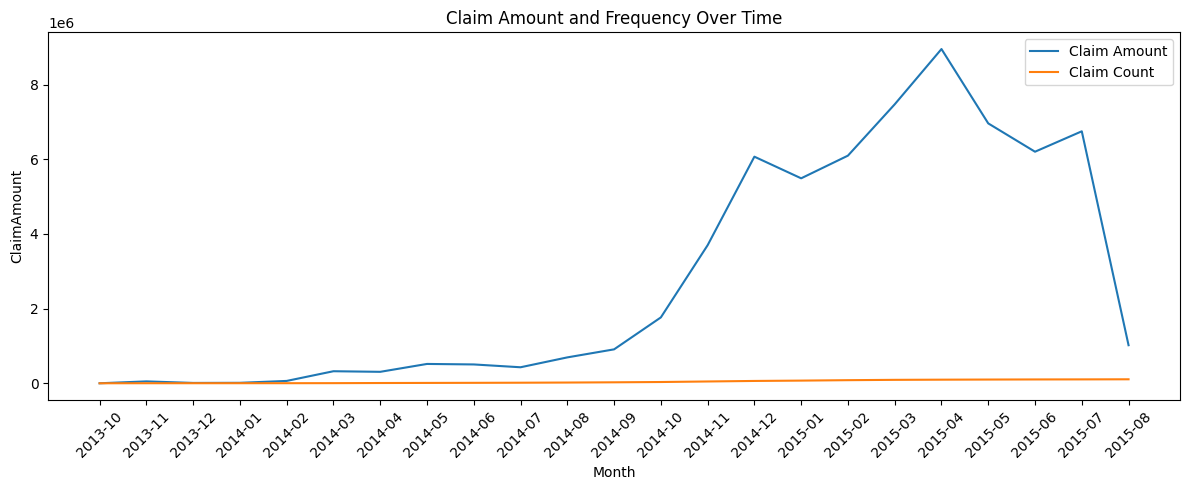

In [50]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Group by month
monthly_stats = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({
    'TotalClaims': ['sum', 'count'],
    'TotalPremium': 'sum'
}).reset_index()

# Rename columns
monthly_stats.columns = ['Month', 'ClaimAmount', 'ClaimCount', 'Premium']

# Plot trends
monthly_stats['Month'] = monthly_stats['Month'].astype(str)
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_stats, x='Month', y='ClaimAmount', label='Claim Amount')
sns.lineplot(data=monthly_stats, x='Month', y='ClaimCount', label='Claim Count')
plt.xticks(rotation=45)
plt.title("Claim Amount and Frequency Over Time")
plt.tight_layout()
plt.show()


3.  Vehicle Makes/Models with Highest & Lowest Claims

In [51]:
# Top makes by avg claim
avg_claim_make = df.groupby('make',observed=False)['TotalClaims'].mean().sort_values(ascending=False)
print("Top Claiming Makes:\n", avg_claim_make.head())
print("\n")

print("Lowest Claiming Makes:\n", avg_claim_make.tail())
print("\n")
# Same for models
avg_claim_model = df.groupby('Model',observed=False)['TotalClaims'].mean().sort_values(ascending=False)
print("Top Claiming Models:\n", avg_claim_model.head())
print("Lowest Claiming Models:\n", avg_claim_model.tail())


Top Claiming Makes:
 make
SUZUKI                                 419.634546
JMC                                    191.684795
HYUNDAI                                174.215195
MARCOPOLO                              156.794806
AUDI                                   137.843083
Name: TotalClaims, dtype: float64


Lowest Claiming Makes:
 make
OPEL       0.0
RENAULT    0.0
SCANIA     0.0
TATA       0.0
VOLVO      0.0
Name: TotalClaims, dtype: float64


Top Claiming Models:
 Model
L/CRUISER FJ 4.0 V6 CRUISER    5340.970273
H-1 2.5 CRDI WAGON A/T         4118.181043
DUCATO 2.3 JTD VETRATO         1014.681021
POLO VIVO 1.6 5Dr               827.558882
C180 BE COUPE                   743.459027
Name: TotalClaims, dtype: float64
Lowest Claiming Models:
 Model
YARIS T3+                            0.000000
YARIS ZEN3                           0.000000
T5 CARAVELLE 2.0 BiTDi               0.000000
115 VITO 2.2 CDI CREW CAB F/C P/V    0.000000
C200K CLASSIC A/T                   -0.250832
Name: Tota

Save the dataset

In [ ]:
df.to_csv('../data/processed/cleaned_dataset.csv', index=False)


In [57]:
%pip install pyarrow
import pyarrow

  Using cached pyarrow-20.0.0-cp313-cp313-win_amd64.whl.metadata (3.4 kB)
Using cached pyarrow-20.0.0-cp313-cp313-win_amd64.whl (25.7 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
import os

# Define the target directory path
parquet_dir = "../data/processed/"

# Create the directory if it doesn't exist
os.makedirs(parquet_dir, exist_ok=True)  # `exist_ok=True` prevents errors if dir already exists

In [63]:
df.to_parquet(os.path.join(parquet_dir, "processed_dataset.parquet"))